# 决策树

假设我们有一个数据集包含鸢尾花的特征（萼片长度、萼片宽度、花瓣长度和花瓣宽度）以及对应的类别（Setosa、Versicolor、Virginica）。最简单的决策树就是个if-else-then的分支。例如对鸢尾花数据分类可以这样做。

In [2]:
import numpy as np

def predict(features):
    # 决策树的判定条件和结果
    if features[2] <= 2.45:
        return 'setosa'
    elif features[3] <= 1.75:
        if features[2] <= 4.95:
            if features[3] <= 1.65:
                return 'versicolor'
            else:
                return 'virginica'
        else:
            if features[3] <= 1.55:
                return 'virginica'
            else:
                return 'versicolor'
    else:
        return 'virginica'

# 测试样例
X_test = np.array([[5.1, 3.5, 1.4, 0.2],
                   [6.3, 2.9, 5.6, 1.8],
                   [4.9, 3.0, 1.4, 0.2]])

for i in range(len(X_test)):
    prediction = predict(X_test[i])
    print("Sample", i+1, "prediction:", prediction)

Sample 1 prediction: setosa
Sample 2 prediction: virginica
Sample 3 prediction: setosa


## 决策树算法流程

将这个经验法则通过数学和算法的方式来自动化处理，就衍生了很多决策树算法。以鸢尾花分类为例，这些算法基本上是这样的过程：


* 特征选择：从训练数据集中选择最优特征作为当前节点的划分特征。通常使用某种准则（如信息增益、基尼指数或信息增益比）来评估特征的重要性。

![](../../images/dicision-tree/dicision-tree-label.png)

![](../../images/dicision-tree/dicision-tree-feature.png)

* 树节点划分：根据选择的特征将训练数据集划分成子集。对于分类问题，每个子集对应于一个特征值或特征值范围；对于回归问题，则根据特征的阈值进行划分。

![](../../images/dicision-tree/dicision-tree.png)

* 递归构建子树：对每个子集递归地应用上述步骤，构建决策树的子树。如果子集中的样本属于同一类别（或具有相似的回归值），则停止划分。

第一层

根节点：被分成17份，8是%2F9否，总体的信息熵为：

$
H_0 = - p(是) * log_2(p(是)) - p(否) * log_2(p(否))
           = - 0.471 * log2(0.471) - 0.529 * log2(0.529)
           ≈ 0.998
$

第二层

清晰：被分成9份，7是/2否，它的信息熵为：

$H_1 = - 7 / 9 * log2(7 / 9) - 2 / 9 * log2(2 / 9) = 0.764$

稍糊：被分成5份，1是/4否，它的信息熵为：

$H_2 = - 1 / 5 * log2(4 / 5) - 1 / 5 * log2(4 / 5) = 0.722$

模糊：被分成3份，0是/3否，它的信息熵为：

$H_3 = 0$

假设我们选取纹理为分类依据，把它作为根节点，那么第二层的加权信息熵可以定义为：

$H’ = 9/17 * H_1 + 5/17 * H_2 + 3/17 * H_3 $

因为$H’< H$，也就是随着决策的进行，其不确定度要减小才行，决策肯定是一个由不确定到确定状态的转变。


* 剪枝：对生成的决策树进行剪枝操作，以减小过拟合风险。剪枝方法可以是预剪枝（在构建树时提前停止划分）或后剪枝（在完整构建树之后剪掉部分叶节点）。

* 终止条件：根据停止条件，确定是否继续构建子树。常见的停止条件包括达到最大深度、样本数量不足或没有更多特征可用。

* 输出决策树：得到最终的决策树模型，可以将其用于预测新的输入数据。

对于集成学习算法（如随机森林和GBDT），会有一些额外步骤：

* 集成学习：对多个决策树进行集成。对于随机森林，每个决策树通过自助采样从原始训练数据集中获得；对于GBDT，每个决策树都是基于前一棵树的残差进行训练。

* 预测结果：对于分类问题，通过投票或多数表决来确定最终的类别；对于回归问题，则取平均或加权平均作为最终的预测值。


## 常见决策树算法

信息熵（information entropy）是信息论的基本概念。描述信息源各可能事件发生的不确定性。20世纪40年代，香农（C.E.Shannon）借鉴了热力学的概念，把信息中排除了冗余后的平均信息量称为“信息熵”，并给出了计算信息熵的数学表达式。信息熵的提出解决了对信息的量化度量问题[1]。


设有一个分类问题的训练数据集S，其中包含C个类别。对于每个类别c，假设样本属于该类别的概率为p©。则数据集S的信息熵定义如下：

$
H = \text{Entropy}(S) = -\sum_{c=1}^{C} p(c) \log_{2}(p(c))
$


其中，对数函数可以选择任意基数（通常选择2作为基数），p©表示样本属于类别c的概率。

以下是计算信息熵的简单示例：

$S = \{ A, A, A, B, B, C \} $

$
p(A) = 3/6 = 0.5 \\
p(B) = 2/6 ≈ 0.333 \\
p(C) = 1/6 ≈ 0.167
$

$
H = Entropy(S) \\
= -(0.5 * log_2(0.5) + 0.333 * log_2(0.333) + 0.167 * log_2(0.167)) \\
≈ -(0.5 * (-1) + 0.333 * (-1.585) + 0.167 * (-2)) \\
≈ 1.459 \\
$

因此，该数据集的信息熵约为1.459。

通过计算信息熵，我们可以衡量数据集中样本的不确定性程度。在决策树算法中，我们希望选择具有最低信息熵（或最大信息增益）的特征来进行划分，以使得子集的不确定性减少，并提高决策树模型的预测能力。

越高 = 越混乱 = 越不纯 = 越不确定


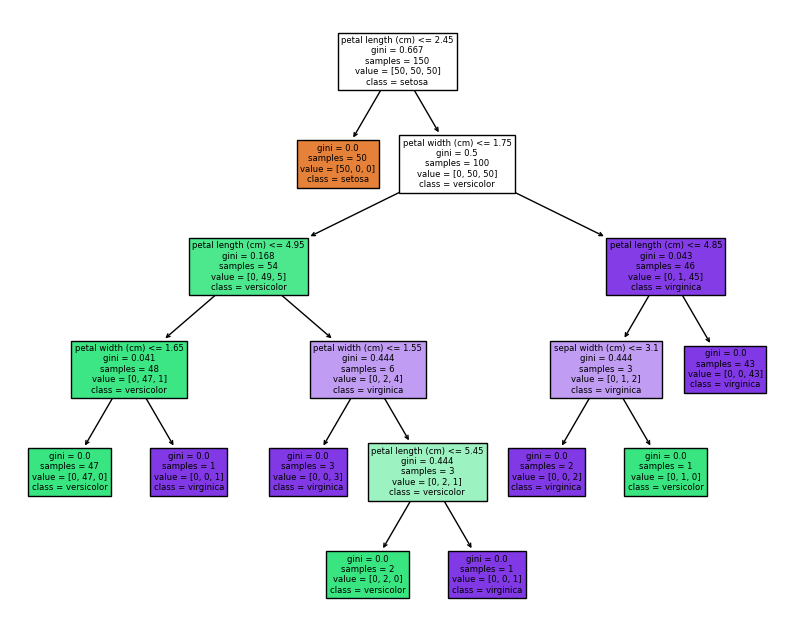

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 构建决策树模型
model = DecisionTreeClassifier()
model.fit(X, y)

# 可视化决策树
fig = plt.figure(figsize=(10, 8))
_ = tree.plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

### ID3（Iterative Dichotomiser 3）

使用信息增益作为特征选择准则来构建决策树。适用于离散型特征和多类别问题。

$Gain(X, Y) = H(Y) - H(Y|X)$

比如上面实例中我选择纹理作为根节点，将根节点一分为三，则：

$Gain(X, 纹理) = 0.998 - 0.764 = 0.234$

意思是，没有选择纹理特征前，是否是好瓜的信息熵为0.998，在我选择了纹理这一特征之后，信息熵下降为0.764，信息熵下降了0.234，也就是信息增益为0.234。

如果某个特征的信息增益较大，意味着使用该特征进行划分能够带来更多的信息量，因此该特征被认为是比较重要的。


### C4.5

C4.5是ID3算法的改进版，优化之一就是引入了信息增益率来解决ID3中信息增益偏向于具有更多取值的特征的问题。

信息增益率=信息增益/特征本身的熵：

$Gain_{ratio}(X, Y) = \frac{Gain(X, Y}{H_Y(X)}$

$H_Y(X) = -\sum_{i=1}^{n}\frac{|X_i|}{|X|}\log_2\frac{|X_i|}{|X|}$

信息增益率对可取值较少的特征有所偏好（分母越小，整体越大），因此C4.5并不是直接用增益率最大的特征进行划分，而是使用一个启发式方法：先从候选划分特征中找到信息增益高于平均值的特征，再从中选择增益率最高的。

### CART（Classification and Regression Trees）

使用基尼系数作为特征选择准则。基尼指数（基尼不纯度）：表示在样本集合中一个随机选中的样本被分错的概率。
基尼系数越小，不纯度越低，特征越好。这和信息增益（率）正好相反。基尼指数可以用来度量任何不均匀分布，是介于0-1之间的数，0是完全相等，1是完全不相等。

$Gini(D) = 1 - \sum_{k=1}^{K} (p_k)^2$

ID3算法只能处理离散特征的分类问题，C4.5能够处理离散特征和连续特征的分类问题，CART算法可以处理离散和连续特征的分类与回归问题。


[1] 信息熵 https://baike.baidu.com/item/%E4%BF%A1%E6%81%AF%E7%86%B5/7302318